Quantum QR-Code Generator

# Using Bernstein-Varirani { limited to encode smaller messages }

In [1]:
from qiskit import *
import qiskit as qk
import qrcode
from qiskit.visualization import plot_histogram

In [2]:
# get user input for message to encode
message = input("Enter message to encode: ")

# remove duplicate characters from the message
message = ''.join(sorted(set(message), key=message.index))

# convert the message to binary
binary_message = ''.join(format(ord(i), '08b') for i in message)


Enter message to encode: u


In [3]:
# initialize the quantum circuit
q = qk.QuantumRegister(len(binary_message) + 1, 'q')
c = qk.ClassicalRegister(len(binary_message), 'c')
qc = qk.QuantumCircuit(q, c)

# apply the H gate to all qubits
qc.h(q)

In [4]:
# define the secret binary string as the oracle
#oracle = '1010110' + '0' * (len(binary_message) - 7)
# define the secret binary string as the oracle
oracle = ''
for i in range(len(binary_message)):
    if binary_message[i] == '0':
        oracle += '1'
    else:
        oracle += '0'

# apply the Z gate to qubits that correspond to 1 in the oracle
for i in range(len(oracle)):
    if oracle[i] == '1':
        qc.z(q[i])
        
# apply the H gate to all qubits except the last one
for i in range(len(binary_message)):
    if i != len(binary_message) - 1:
        qc.h(q[i])

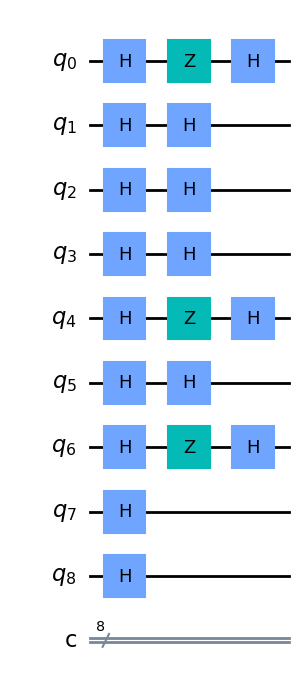

In [5]:
qc.draw('mpl')

In [6]:
# measure the qubits and store the result in the classical register
qc.measure(q[:-1], c)
# simulate the circuit using the qasm simulator
simulator = qk.Aer.get_backend('aer_simulator')
result = qk.execute(qc, simulator, shots=1024).result()

# extract the result and convert it to binary
counts = result.get_counts()
measurement = list(counts.keys())[0]
binary_measurement = measurement[::-1]

In [7]:
# generate the QR code
qr = qrcode.QRCode(version=None, error_correction=qrcode.constants.ERROR_CORRECT_L, box_size=10, border=4)
qr.add_data(message)
qr.make(fit=True)
img = qr.make_image(fill_color="black", back_color="white")
#img_name = "qrcode_" + message + ".png" # define image name
img.save('q_1.png')

Secret Code:  01110101
Measurement:  10001011


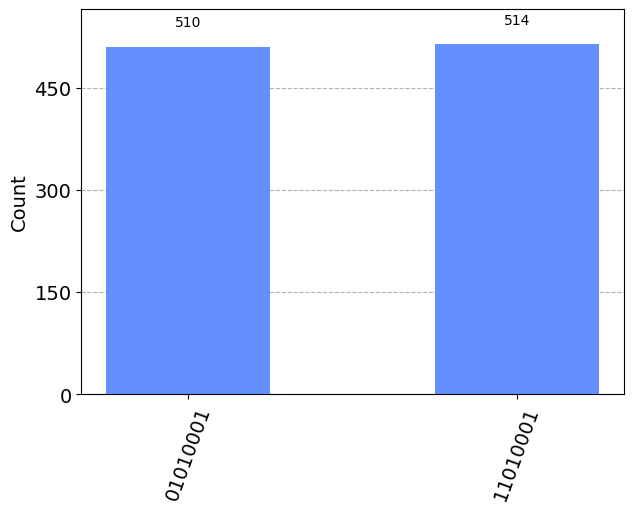

In [8]:
# print the secret code and the binary measurement
print("Secret Code: ", binary_message)
print("Measurement: ", binary_measurement)

# plot the histogram of the result
plot_histogram(result.get_counts())

# Error correction { simple one-qubit error correction code } 

In [9]:
# get user input for message to encode
message = input("Enter message to encode: ")

# remove duplicate characters from the message
message = ''.join(sorted(set(message), key=message.index))

# convert the message to binary
binary_message = ''.join(format(ord(i), '08b') for i in message)

Enter message to encode: u


In [10]:
# initialize the quantum circuit
q = qk.QuantumRegister(len(binary_message) + 1, 'q')
c = qk.ClassicalRegister(len(binary_message), 'c')
qc = qk.QuantumCircuit(q, c)

# apply the H gate to all qubits
qc.h(q)

In [11]:
# define the secret binary string as the oracle
oracle = ''
for i in range(len(binary_message)):
    if binary_message[i] == '0':
        oracle += '0'
    else:
        oracle += '1'

# apply the Z gate to qubits that correspond to 1 in the oracle
for i in range(len(oracle)):
    if oracle[i] == '1':
        qc.z(q[i])
        
# apply the H gate to all qubits except the last one
for i in range(len(binary_message)):
    if i != len(binary_message) - 1:
        qc.h(q[i])

# apply the barrier to separate encoding and decoding circuits
qc.barrier()

# apply the H gate to all qubits in the decoding circuit
for i in range(len(binary_message)):
    qc.h(q[i])

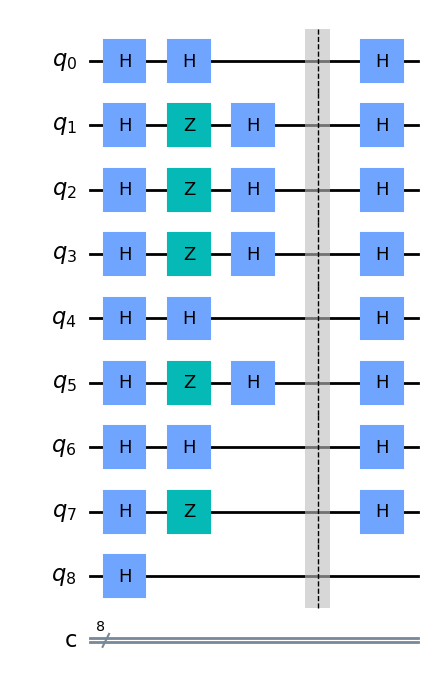

In [12]:
qc.draw('mpl')

In [13]:
# measure the qubits and store the result in the classical register
qc.measure(q[:-1], c)

# simulate the circuit using the qasm simulator
simulator = qk.Aer.get_backend('qasm_simulator')
result_1 = qk.execute(qc, simulator, shots=100).result()

# extract the result and convert it to binary
counts = result_1.get_counts()
measurement = list(counts.keys())[0]
binary_measurement = measurement[::-1]

In [14]:
# if the binary measurement is not the same as the secret binary string, flip the last qubit
if binary_measurement != binary_message:
    anc = qk.QuantumRegister(1, 'anc')
    qc.add_register(anc)
    qc.x(anc)
    qc.h(anc)
    qc.cx(q[-1], anc[0])
    qc.h(anc)
    qc.measure(anc, c[-1])
    result_1 = qk.execute(qc, simulator, shots=100).result()
    counts = result_1.get_counts()
    measurement = list(counts.keys())[0]
    binary_measurement = measurement[::-1]

In [15]:
# generate the QR code
qr = qrcode.QRCode(version=None, error_correction=qrcode.constants.ERROR_CORRECT_L, box_size=10, border=4)
qr.add_data(message)
qr.make(fit=True)
img = qr.make_image(fill_color="black", back_color="white")
#img_name = "qrcode_" + message + ".png" # define image name
img.save('q_2.png')

Secret Code:  01110101
Measurement:  10101101


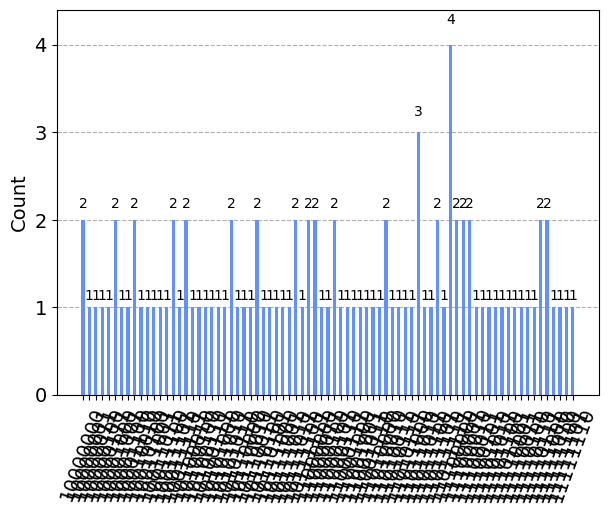

In [16]:
# print the secret code and the binary measurement
print("Secret Code: ", binary_message)
print("Measurement: ", binary_measurement)

# plot the histogram of the result
plot_histogram(result_1.get_counts())

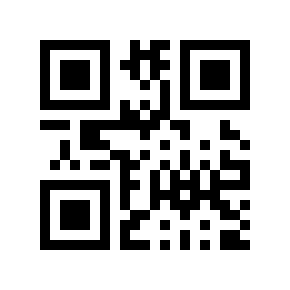

In [17]:
from IPython import display
display.Image('q_1.png')


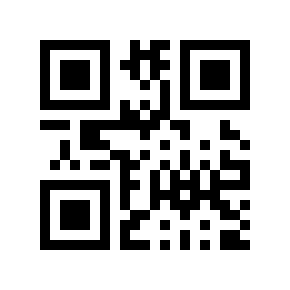

In [18]:
display.Image('q_2.png')

#  Using Quantum Fourier Transform (QFT) { to extend the encoding to support larger messages }

In [24]:
from qiskit.circuit.library.standard_gates import CU1Gate

In [28]:
from qiskit import *
import qiskit as qk
import qrcode
from qiskit.visualization import plot_histogram
import math

# get user input for message to encode
message = input("Enter message to encode: ")

# convert the message to binary
binary_message = ''.join(format(ord(i), '08b') for i in message)

# calculate the required number of qubits
n = math.ceil(math.log2(len(binary_message) + 1))
m = len(binary_message)

# initialize the quantum circuit
q = qk.QuantumRegister(n + m, 'q')
c = qk.ClassicalRegister(m, 'c')
qc = qk.QuantumCircuit(q, c)

# apply the H gate to all qubits
qc.h(q)

# apply the QFT to the qubits
qc.swap(q[0], q[n+m-1])
for i in range(n+m-1):
    qc.h(q[i])
    for j in range(i+1, n+m):
        qc.append(CU1Gate(math.pi/(2**(i-j))), [q[i], q[j]])
    qc.barrier()

# apply the oracle
for i in range(m):
    if binary_message[i] == '1':
        qc.x(q[i])

# apply the inverse QFT to the qubits
for i in range(n-1, 0, -1):
    for j in range(i-1, -1, -1):
        qc.append(CU1Gate(-math.pi/(2**(i-j))), [q[i], q[j]])
    qc.h(q[i])
    qc.barrier()
qc.swap(q[0], q[n+m-1])

# apply the H gate to all qubits except the last one
for i in range(n+m-1):
    qc.h(q[i])

Enter message to encode: warm


In [34]:
import qcircuit
qc.draw()

┌───┐   ┌───┐                                                         »
 q_0: ┤ H ├─X─┤ H ├─■────────■────────■────────■─────────■─────────■────────»
      ├───┤ │ └───┘ │U1(2π)  │        │        │         │         │        »
 q_1: ┤ H ├─┼───────■────────┼────────┼────────┼─────────┼─────────┼────────»
      ├───┤ │                │U1(4π)  │        │         │         │        »
 q_2: ┤ H ├─┼────────────────■────────┼────────┼─────────┼─────────┼────────»
      ├───┤ │                         │U1(8π)  │         │         │        »
 q_3: ┤ H ├─┼─────────────────────────■────────┼─────────┼─────────┼────────»
      ├───┤ │                                  │U1(16π)  │         │        »
 q_4: ┤ H ├─┼──────────────────────────────────■─────────┼─────────┼────────»
      ├───┤ │                                            │U1(32π)  │        »
 q_5: ┤ H ├─┼────────────────────────────────────────────■─────────┼────────»
      ├───┤ │                                                      │U1(64π) »
 q_6: ┤ H ├─┼──────────────────────────────────────────────────────■────────»
      ├───┤ │                                                               »
 q_7: ┤ H ├─┼───────────────────────────────────────────────────────────────»
      ├───┤ │                                                               »
 q_8: ┤ H ├─┼───────────────────────────────────────────────────────────────»
      ├───┤ │                                                               »
 q_9: ┤ H ├─┼───────────────────────────────────────────────────────────────»
      ├───┤ │                                                               »
q_10: ┤ H ├─┼───────────────────────────────────────────────────────────────»
      ├───┤ │                                                               »
q_11: ┤ H ├─┼───────────────────────────────────────────────────────────────»
      ├───┤ │                                                               »
q_12: ┤ H ├─┼───────────────────────────────────────────────────────────────»
      ├───┤ │                                                               »
q_13: ┤ H ├─┼───────────────────────────────────────────────────────────────»
      ├───┤ │                                                               »
q_14: ┤ H ├─┼───────────────────────────────────────────────────────────────»
      ├───┤ │                                                               »
q_15: ┤ H ├─┼───────────────────────────────────────────────────────────────»
      ├───┤ │                                                               »
q_16: ┤ H ├─┼───────────────────────────────────────────────────────────────»
      ├───┤ │                                                               »
q_17: ┤ H ├─┼───────────────────────────────────────────────────────────────»
      ├───┤ │                                                               »
q_18: ┤ H ├─┼───────────────────────────────────────────────────────────────»
      ├───┤ │                                                               »
q_19: ┤ H ├─┼───────────────────────────────────────────────────────────────»
      ├───┤ │                                                               »
q_20: ┤ H ├─┼───────────────────────────────────────────────────────────────»
      ├───┤ │                                                               »
q_21: ┤ H ├─┼───────────────────────────────────────────────────────────────»
      ├───┤ │                                                               »
q_22: ┤ H ├─┼───────────────────────────────────────────────────────────────»
      ├───┤ │                                                               »
q_23: ┤ H ├─┼───────────────────────────────────────────────────────────────»
      ├───┤ │                                                               »
q_24: ┤ H ├─┼───────────────────────────────────────────────────────────────»
      ├───┤ │                                                               »
q_25: ┤ H ├─┼───────────────

Secret Code:  01110111011000010111001001101101
Measurement:  01110110111111101101010001000001


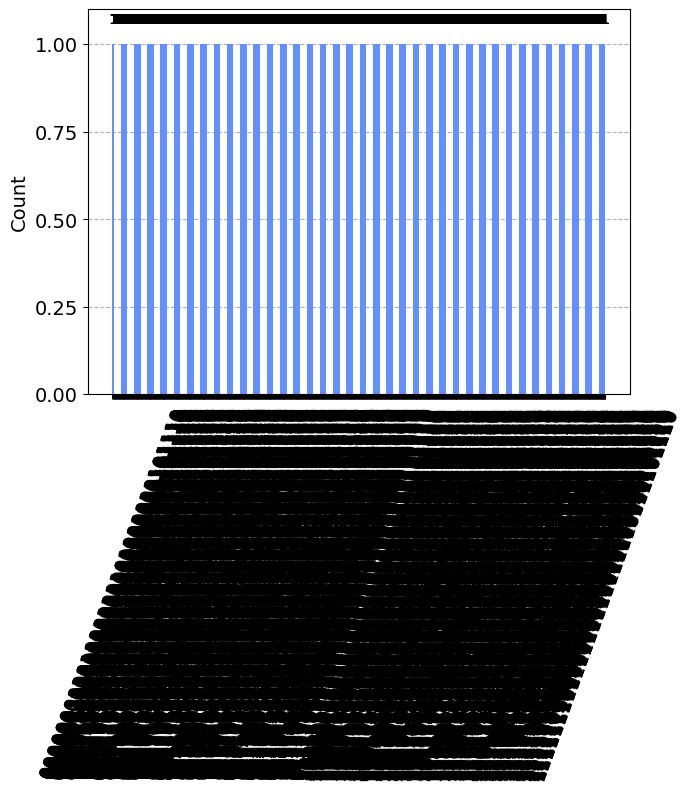

In [35]:
# measure the qubits and store the result in the classical register
qc.measure(q[:m], c)

# simulate the circuit using the qasm simulator
simulator = qk.Aer.get_backend('aer_simulator')
result = qk.execute(qc, simulator, shots=1024).result()

# extract the result and convert it to binary
counts = result.get_counts()
measurement = list(counts.keys())[0]
binary_measurement = measurement[::-1]

# generate the QR code
qr = qrcode.QRCode(version=None, error_correction=qrcode.constants.ERROR_CORRECT_L, box_size=10, border=4)
qr.add_data(message)
qr.make(fit=True)
img = qr.make_image(fill_color="black", back_color="white")
img.save('qft_1.png')

# print the secret code and the binary measurement
print("Secret Code: ", binary_message)
print("Measurement: ", binary_measurement)

# plot the histogram of the result
plot_histogram(result.get_counts())


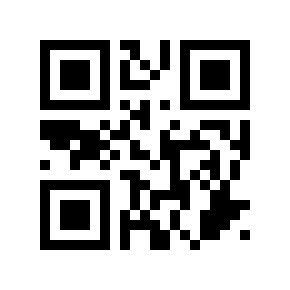

In [36]:
display.Image('qft_1.png')